In [37]:
import numpy as np
import pandas as pd

from sklearn.manifold import trustworthiness
from sklearn.metrics import silhouette_score

from tqdm.autonotebook import tqdm

from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

output_dir = MODEL_DIR/'projections' 

In [38]:
metrics_df = pd.read_pickle(DATA_DIR / 'projection_metrics.pickle')

In [39]:
metrics_df[:3]

,dataset,class_,dim,trustworthiness,silhouette_score,silhouette_samples
0,mnist,umap-learn,2,0.960056,0.518626,"[0.639216248568865, 0.781801993664271, 0.44323..."
1,mnist,direct,2,0.960416,0.519683,"[0.6649555493948871, 0.7389523838324524, 0.464..."
2,mnist,network,2,0.957346,0.555885,"[0.6068383792564549, 0.8137081492037734, 0.522..."


In [50]:
for dataset in ['mnist', 'fmnist', 'cassins_dtw', 'makosco2015']:
    for n_components in ['2']:
        save_loc = DATA_DIR / 'projection_metrics' / 'train' / str(n_components) / (dataset + '.pickle')
        metric_df = pd.read_pickle(save_loc)
        metrics_df = pd.concat([metrics_df, metric_df])

In [51]:
metrics_df[metrics_df.dataset]

KeyError: "None of [Index(['mnist', 'mnist', 'mnist', 'mnist', 'mnist', 'mnist', 'mnist', 'mnist',\n       'mnist', 'mnist', 'mnist', 'fmnist', 'fmnist', 'fmnist', 'fmnist',\n       'fmnist', 'fmnist', 'fmnist', 'fmnist', 'fmnist', 'fmnist', 'fmnist',\n       'cifar10', 'cifar10', 'cifar10', 'cifar10', 'cifar10', 'cifar10',\n       'cifar10', 'cifar10', 'cifar10', 'cifar10', 'cifar10', 'macosko2015',\n       'macosko2015', 'macosko2015', 'macosko2015', 'macosko2015',\n       'macosko2015', 'macosko2015', 'macosko2015', 'macosko2015',\n       'macosko2015', 'macosko2015', 'cassins_dtw', 'cassins_dtw',\n       'cassins_dtw', 'cassins_dtw', 'cassins_dtw', 'cassins_dtw',\n       'cassins_dtw', 'cassins_dtw', 'cassins_dtw', 'cassins_dtw',\n       'cassins_dtw', 'mnist', 'fmnist', 'cassins', 'macosko2015', 'mnist',\n       'fmnist', 'mnist', 'fmnist', 'mnist', 'fmnist', 'mnist', 'fmnist',\n       'cassins', 'macosko2015'],\n      dtype='object')] are in the [columns]"

In [59]:
metrics_df.loc[metrics_df.dataset == 'cassins', 'dataset'] = 'cassins_dtw'

In [60]:
metrics_df[-3:]

,dataset,class_,dim,trustworthiness,silhouette_score,silhouette_samples
0,fmnist,parametric-tsne,2,0.982720,0.201303,"[0.6231377233668559, 0.4950800214069023, -0.27..."
0,cassins_dtw,parametric-tsne,2,0.985611,0.742322,"[0.8330382289009316, 0.7695866976623688, 0.771..."
0,macosko2015,parametric-tsne,2,0.946283,0.257810,"[0.3406608482046336, 0.8008643850128306, 0.103..."


In [61]:
import seaborn as sns

In [62]:
import matplotlib.pyplot as plt

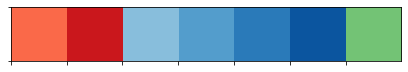

In [63]:
palette = sns.color_palette('Reds', 3)[1:] + sns.color_palette('Blues', 6)[2:] + sns.color_palette('Greens', 1) 
sns.palplot(palette)

In [64]:
from tfumap.paths import FIGURE_DIR, save_fig

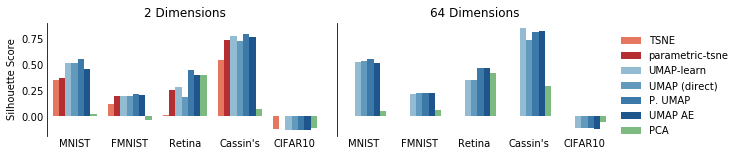

In [65]:
fg = sns.catplot(
    x="dataset",
    y="silhouette_score",
    hue="class_",
    hue_order=["TSNE", "parametric-tsne", "umap-learn", "direct", "network", "autoencoder", "PCA"],
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dim",
    height=2.5, 
    aspect=1.75,
    data=metrics_df,
    kind="bar",
    palette=palette,
    #legend=False
)
(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "Silhouette Score")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
fg._legend._legend_title_box._text.set_text("")
#fg._legend.texts[2].set_text("P. UMAP")
#fg._legend.texts[3].set_text("UMAP AE")
ax.set_title('2 Dimensions')
ax = fg.axes[0][1]
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('64 Dimensions')


fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP-learn')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network'))[0][0]].set_text('P. UMAP')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'direct'))[0][0]].set_text('UMAP (direct)')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')

#save_fig(FIGURE_DIR/'silhouette', save_pdf=True, dpi=300)

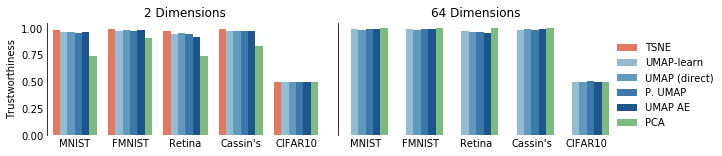

In [10]:
fg = sns.catplot(
    x="dataset",
    y="trustworthiness",
    hue="class_",
    hue_order=["TSNE", "umap-learn", "direct", "network", "autoencoder", "PCA"],
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dim",
    height=2.5, 
    aspect=1.75,
    data=metrics_df,
    kind="bar",
    palette=palette,
    #legend=False
)
(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "Trustworthiness")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
fg._legend._legend_title_box._text.set_text("")


ax.set_title('2 Dimensions')
ax = fg.axes[0][1]
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('64 Dimensions')

fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP-learn')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network'))[0][0]].set_text('P. UMAP')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'direct'))[0][0]].set_text('UMAP (direct)')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')

#save_fig(FIGURE_DIR/'trustworthiness', save_pdf=True, dpi=300)